# Cálculo de mensalidades para uma escola de período integral

O cálculo será feito baseado nos valores do ano 2023 e depois será calculado um reajuste.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

from sklearn.linear_model import LinearRegression

Lendo o arquivo que contem os valores tabelados de mensalidade e os efetivamentente pagos em função do número de horas na escola para o mês de agosto.

In [2]:
mens_ago = pd.read_csv('../dados/mensalidades_ago.csv')
mens_ago

,horas,pago,tabelado
0,4.0,1130.370000,1339.5800
1,4.0,964.324850,1339.5800
2,4.0,964.885101,1339.5800
3,4.0,992.371000,1339.5800
4,4.0,1173.910000,1339.5800
5,4.0,1023.957934,1339.5800
6,5.0,1137.170000,1503.0050
7,6.0,1144.530000,1666.4300
8,6.0,1115.850000,1666.4300
9,6.0,1530.630000,1666.4300


Lendo o arquivo que contem os valores tabelados de mensalidade para o ano de 2023.

In [3]:
plano_2023 = pd.read_csv('../dados/plano_2023.csv')
plano_2023

,horas,valores
0,4.0,1339.58
1,6.0,1666.43
2,8.0,1874.48
3,10.0,2314.47
4,12.0,2684.79


Gráfico para comparar os valores tabelados e os efetivamente pagos em agosto de 2023.

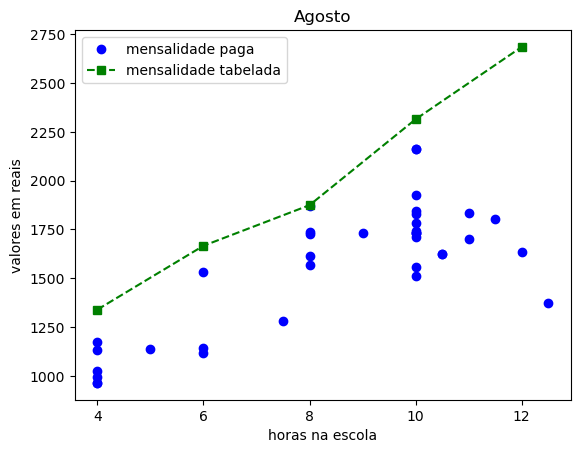

In [4]:
fig, ax = plt.subplots()

ax.plot(
    mens_ago['horas'],
    mens_ago['pago'],
    marker='o',
    color='blue',
    lw=0,
    label='mensalidade paga',
)

ax.plot(
    plano_2023['horas'],
    plano_2023['valores'],
    marker='s',
    color='green',
    linestyle='dashed',
    label='mensalidade tabelada',
)

ax.set_title('Agosto')
ax.set_xlabel('horas na escola')
ax.set_ylabel('valores em reais')
ax.legend(loc='upper left', ncols=1)

fig.savefig('../imagens/mensalidades_2023.png')

Gráfico contendo todas as combinações possíveis de desconto.

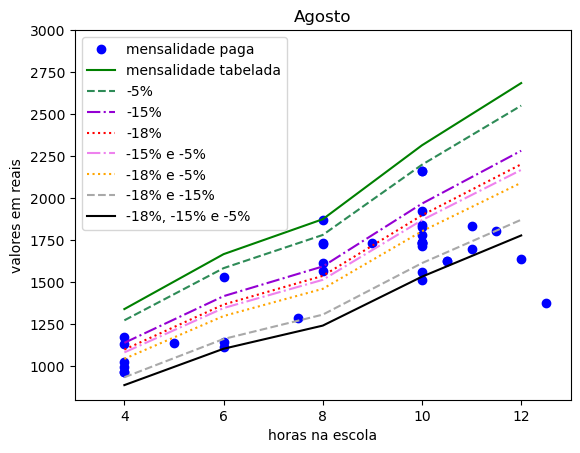

In [5]:
fig, ax = plt.subplots()

ax.plot(
    mens_ago['horas'],
    mens_ago['pago'],
    marker='o',
    color='blue',
    lw=0,
    label='mensalidade paga',
)

ax.plot(
    plano_2023['horas'],
    plano_2023['valores'],
    color='green',
    linestyle='-',
    label='mensalidade tabelada',
)

ax.plot(
    plano_2023['horas'],
    plano_2023['valores']*0.95,
    color='seagreen',
    linestyle='--',
    label='-5%',
)

ax.plot(
    plano_2023['horas'],
    plano_2023['valores']*0.85,
    color='darkviolet',
    linestyle='-.',
    label='-15%',
)

ax.plot(
    plano_2023['horas'],
    plano_2023['valores']*0.82,
    color='red',
    linestyle=':',
    label='-18%',
)

ax.plot(
    plano_2023['horas'],
    plano_2023['valores']*0.85*0.95,
    color='violet',
    linestyle='-.',
    label='-15% e -5%',
)

ax.plot(
    plano_2023['horas'],
    plano_2023['valores']*0.82*0.95,
    color='orange',
    linestyle=':',
    label='-18% e -5%',
)

ax.plot(
    plano_2023['horas'],
    plano_2023['valores']*0.82*0.85,
    color='darkgray',
    linestyle='--',
    label='-18% e -15%',
)
ax.plot(
    plano_2023['horas'],
    plano_2023['valores']*0.82*0.85*0.95,
    color='black',
    linestyle='-',
    label='-18%, -15% e -5%',
)

ax.set_title('Agosto')
ax.set_xlabel('horas na escola')
ax.set_ylabel('valores em reais')
ax.legend(loc='upper left', ncols=1)
ax.set_xlim(3,13)
ax.set_ylim(800,3000)

fig.savefig('../imagens/mensalidades_2023_descontos.png')

# Modelo 1 para as mensalidades tabeladas para 2023

Vamos do simples para o complexo...

Modelo linear com o número de horas.

In [6]:
x = np.array(plano_2023['horas']).reshape((-1, 1))
y = np.array(plano_2023['valores'])
modelo = LinearRegression().fit(x, y)
# y = a x + b
a = modelo.coef_[0]
b = modelo.intercept_

In [7]:
print(f"coeficiente linear: ",b)
print(f"coeficiente angular:",a)

coeficiente linear:  640.5660000000003
coeficiente angular: 166.92299999999997


Definindo como primeiro modelo a ser testado:

In [8]:
def modelo1(h):
    return np.round((a*h+b),2)

# vetorizando a função para receber arrays de argumento
v_modelo1 = np.vectorize(modelo1)

Gráfico do modelo linear

In [9]:
h = np.array(range(4,13))

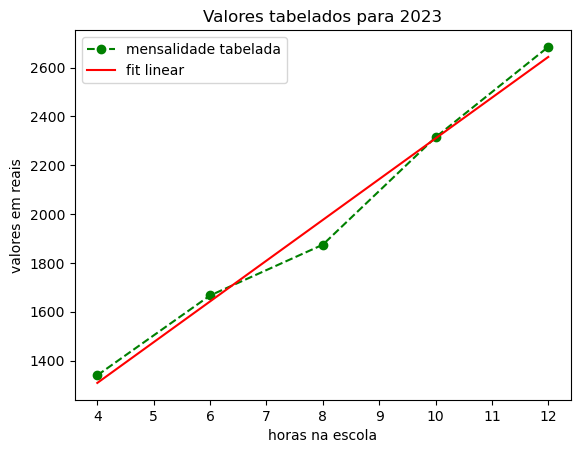

In [10]:
fig, ax = plt.subplots()

ax.plot(
    plano_2023['horas'],
    plano_2023['valores'],
    marker='o',
    color='green',
    linestyle='--',
    label='mensalidade tabelada',
)
ax.plot(
    h,
    v_modelo1(h),
    color='red',
    linestyle='-',
    label='fit linear',
)


ax.set_title('Valores tabelados para 2023')
ax.set_xlabel('horas na escola')
ax.set_ylabel('valores em reais')
ax.legend(loc='upper left', ncols=1)

fig.savefig('../imagens/mensalidades_2023_fitlinear.png')

Quero verificar se esse modelo simples é capaz de suprir as despesas da escola. Vou usar a despesa média dos meses estudados e o número médio de alunos no mesmo período.

In [11]:
despesas = pd.read_csv('../dados/despesas_2023.csv')
despesas

,meses,valores,n
0,6,58136.22,43
1,7,73274.51,43
2,8,74271.44,40
3,9,64923.11,33
4,10,55771.65,33


In [12]:
despesa_media=despesas['valores'].mean()
despesa_media

65275.386

In [13]:
n_medio=despesas['n'].mean()
n_medio

38.4

In [14]:
# media de horas de permanencia de um aluno na escola
mens_ago['horas'].mean()

8.445945945945946

Cálculo do custo médio de 1 aluno:


In [15]:
custo_aluno = despesas['valores'].sum()/despesas['n'].sum()
custo_aluno

1699.87984375

Cálculo da mensalidade média paga por aluno segundo o modelo.

Para o cálculo, vou a distribuição do mês de agosto como referência.

In [17]:
mens_ago['modelo 1'] = v_modelo1(mens_ago['horas'])
mens_ago

,horas,pago,tabelado,modelo 1
0,4.0,1130.370000,1339.5800,1308.26
1,4.0,964.324850,1339.5800,1308.26
2,4.0,964.885101,1339.5800,1308.26
3,4.0,992.371000,1339.5800,1308.26
4,4.0,1173.910000,1339.5800,1308.26
5,4.0,1023.957934,1339.5800,1308.26
6,5.0,1137.170000,1503.0050,1475.18
7,6.0,1144.530000,1666.4300,1642.10
8,6.0,1115.850000,1666.4300,1642.10
9,6.0,1530.630000,1666.4300,1642.10


In [18]:
# mensalidade média segundo modelo 1
mens1 = mens_ago['modelo 1'].mean()
mens1

2050.3900000000003

In [19]:
# lucro médio por aluno
mens1-custo_aluno

350.51015625000036

In [20]:
# lucro médio mensal possível nos meses estudados com o modelo linear
(mens1-custo_aluno)*despesas['n'].mean()

13459.590000000013

In [21]:
# lucro médio mensal possível nos meses estudados com a tabela vigente
(mens_ago['tabelado'].mean()-custo_aluno)*despesas['n'].mean()

13281.027405405397

## Comparando o modelo 1 com a concorrência estudada. 

In [22]:
concorrencia = pd.read_csv('../dados/concorrencia.csv')
concorrencia

,horas,A,B
0,4.0,938.21,1047.20
1,6.0,2253.22,1204.28
2,8.0,2425.41,2513.27
3,10.0,2894.98,2722.71
4,12.0,3019.42,2932.15


Gráfico comparando a tabela, o modelo e a concorrência:

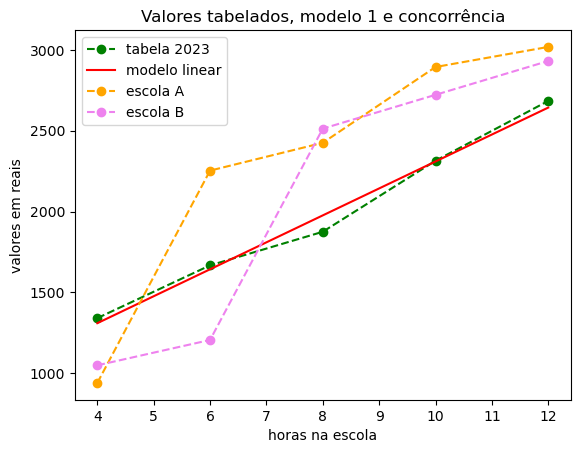

In [23]:
fig, ax = plt.subplots()

ax.plot(
    plano_2023['horas'],
    plano_2023['valores'],
    marker='o',
    color='green',
    linestyle='--',
    label='tabela 2023',
)
ax.plot(
    h,
    v_modelo1(h),
    color='red',
    linestyle='-',
    label='modelo linear',
)

ax.plot(
    concorrencia['horas'],
    concorrencia['A'],
    marker='o',
    color='orange',
    linestyle='--',
    label='escola A',
)

ax.plot(
    concorrencia['horas'],
    concorrencia['B'],
    marker='o',
    color='violet',
    linestyle='--',
    label='escola B',
)

ax.set_title('Valores tabelados, modelo 1 e concorrência')
ax.set_xlabel('horas na escola')
ax.set_ylabel('valores em reais')
ax.legend(loc='upper left', ncols=1)

fig.savefig('../imagens/mensalidades_2023_concorrencia.png')

# Modelo 2 para as mensalidades tabeladas para 2023

Cálculo do valor médio da hora no modelo linear (usamos o mês de agosto como referência para a distribuição dos alunos segundo as horas de permanência na escola))

In [24]:
valor_hora_modelo1 = mens1/mens_ago['horas'].mean()
valor_hora_modelo1

242.76617600000006

Cálculo do custo de 1 aluno por hora de permanência na escola

In [26]:
custo_aluno/mens_ago['horas'].mean()

201.2657735

Considerando a mesma distribuição, queremos quanto seria o valor médio da hora nas escolas A e B.

In [27]:
mens_ago2  = mens_ago.merge(concorrencia, left_on='horas', right_on='horas', how='left')

In [28]:
mens_ago2.set_index('horas')

,pago,tabelado,modelo 1,A,B
horas,,,,,
4.0,1130.370000,1339.5800,1308.26,938.21,1047.20
4.0,964.324850,1339.5800,1308.26,938.21,1047.20
4.0,964.885101,1339.5800,1308.26,938.21,1047.20
4.0,992.371000,1339.5800,1308.26,938.21,1047.20
4.0,1173.910000,1339.5800,1308.26,938.21,1047.20
4.0,1023.957934,1339.5800,1308.26,938.21,1047.20
5.0,1137.170000,1503.0050,1475.18,NaN,NaN
6.0,1144.530000,1666.4300,1642.10,2253.22,1204.28
6.0,1115.850000,1666.4300,1642.10,2253.22,1204.28


In [29]:
# interpolação linear para prever valores não estipulados na tabela da concorrência
mens_ago3 = mens_ago2.interpolate(method='index')

In [30]:
# media do valor da hora na escola A
valor_hora_A = mens_ago3['A'].mean()/mens_ago['horas'].mean()
valor_hora_A

285.875168

In [31]:
# media do valor da hora na escola B
valor_hora_B = mens_ago3['B'].mean()/mens_ago['horas'].mean()
valor_hora_B

266.741936

Gráfico com as mensalidades médias considerando a disribuição de agosto

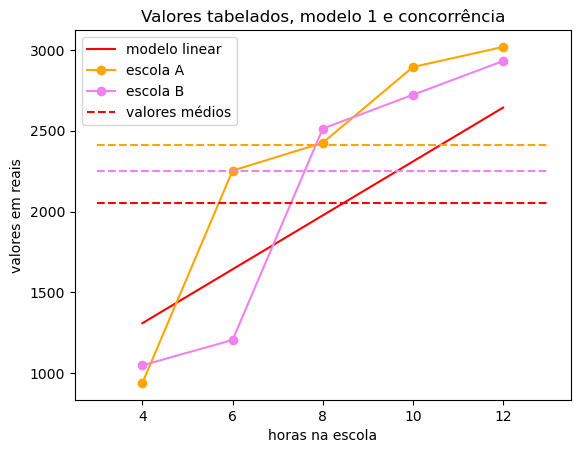

In [33]:
fig, ax = plt.subplots()

ax.plot(
    h,
    v_modelo1(h),
    color='red',
    linestyle='-',
    label='modelo linear',
)

ax.plot(
    concorrencia['horas'],
    concorrencia['A'],
    marker='o',
    color='orange',
    linestyle='-',
    label='escola A',
)

ax.plot(
    concorrencia['horas'],
    concorrencia['B'],
    marker='o',
    color='violet',
    linestyle='-',
    label='escola B',
)

ax.hlines(
    [mens_ago3['modelo 1'].mean(), mens_ago3['A'].mean(), mens_ago3['B'].mean()],
    3, 13,
    color =['red','orange', 'violet'],
    linestyle='--',
    label='valores médios',
)

ax.set_title('Valores tabelados, modelo 1 e concorrência')
ax.set_xlabel('horas na escola')
ax.set_ylabel('valores em reais')
ax.legend(loc='upper left', ncols=1)

fig.savefig('../imagens/mensalidades_2023_concorrencia_media.png')

Cálculo da mensalidade média para 4 horas das escolas A e B

In [34]:
(concorrencia['A'][0]+concorrencia['B'][0])/2

992.705

Vamos usar um modelo linear onde o valor da hora é de R$ 240

In [35]:
def modelo2(h):
    return 240*h

# vetorizando a função para receber arrays de argumento
v_modelo2 = np.vectorize(modelo2)

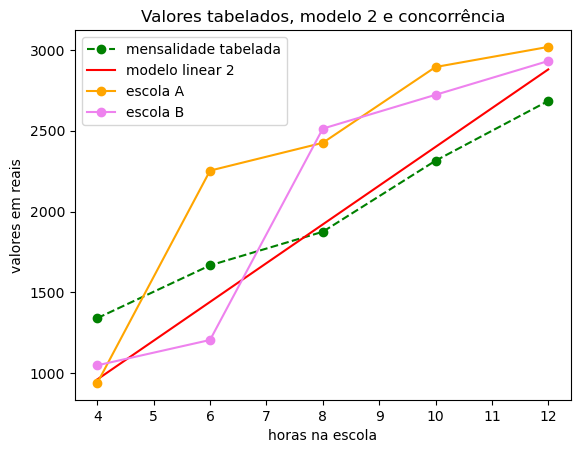

In [36]:
fig, ax = plt.subplots()

ax.plot(
    plano_2023['horas'],
    plano_2023['valores'],
    marker='o',
    color='green',
    linestyle='--',
    label='mensalidade tabelada',
)

ax.plot(
    h,
    v_modelo2(h),
    color='red',
    linestyle='-',
    label='modelo linear 2',
)

ax.plot(
    concorrencia['horas'],
    concorrencia['A'],
    marker='o',
    color='orange',
    linestyle='-',
    label='escola A',
)

ax.plot(
    concorrencia['horas'],
    concorrencia['B'],
    marker='o',
    color='violet',
    linestyle='-',
    label='escola B',
)


ax.set_title('Valores tabelados, modelo 2 e concorrência')
ax.set_xlabel('horas na escola')
ax.set_ylabel('valores em reais')
ax.legend(loc='upper left', ncols=1)

fig.savefig('../imagens/mensalidades_2023_modelo2.png')

In [37]:
mens_ago['modelo 2'] = v_modelo2(mens_ago['horas'])

Definindo um teste para saber se os modelos mais complexos também serão capazes de suprir as despesas e ganhar da concorrência.

In [53]:
def teste(modelo):
    if mens_ago[modelo].mean() <= despesas['valores'].mean():
        print('lucro mensal médio de ','R$',np.round((mens_ago[modelo].mean()-custo_aluno)*despesas['n'].mean(),2)  )
    else:
        print('não cobre as despesas')

In [54]:
teste('modelo 1')

lucro mensal médio de  R$ 13459.59


In [55]:
teste('modelo 2')

lucro mensal médio de  R$ 12562.45


Suavizando a curva de mensalidades para mais de 8h de permanência na escola

In [ ]:
def modelo_2023(h):
    if h<=8:
        f = 1
    elif h<=9:
        f = 0.95
    elif h<=10:
        f = 0.90
    elif h<=11:
        f = 0.85 
    else:
        f = 0.80
    return np.round((a*h+b)*f,2)

In [ ]:
# vetorizando a função para receber arrays de argumento
v_modelo_2023 = np.vectorize(modelo_2023)

Gráfico do modelo suavizado

In [ ]:
h = np.array([4,6,8,10,12])
fig, ax = plt.subplots()

ax.plot(
    plano_2023['horas'],
    plano_2023['valores'],
    marker='o',
    color='green',
    linestyle='--',
    label='mensalidade tabelada',
)
ax.plot(
    h,
    v_modelo_2023(h),
    color='red',
    linestyle='-',
    label='fit linear',
)


ax.set_title('Valores tabelados para 2023')
ax.set_xlabel('horas na escola')
ax.set_ylabel('valores em reais')
ax.legend(loc='upper left', ncols=1)

fig.savefig('../imagens/mensalidades_2023_fitlinear.png')